In [125]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report , f1_score , precision_score , recall_score 
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , GridSearchCV

In [171]:
df = pd.read_csv('./archive-3/train_dataset.csv')
df.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
0,9,0.75,3.94,NaN,960,0,0.0,0,0,8.0,...,1,0,0,0,0,0,0,0,1,0.755167
1,7,0.65,30.10,909.0,7080,0,0.0,0,1,59.0,...,0,0,1,0,0,0,1,0,0,0.535678
2,3,0.80,4.15,NaN,1440,0,0.0,0,0,7.0,...,0,1,0,0,0,0,0,0,1,0.820833
3,1,0.65,22.53,762.0,5040,0,0.0,0,1,42.0,...,0,0,1,0,0,0,0,0,1,0.581131
4,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,...,0,0,1,1,0,0,0,0,0,0.790003


In [172]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
count,1017.000000,1017.000000,1017.000000,594.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,...,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,6.443461,0.730747,15.150492,1183.183502,4532.940020,40.689282,0.564405,0.398230,0.160275,34.846116,...,0.201573,0.214356,0.584071,0.161259,0.152409,0.164208,0.165192,0.171091,0.185841,0.736509
std,3.472473,0.097384,10.946096,1793.836719,3275.997333,173.240655,10.093731,3.351712,0.440199,22.185292,...,0.401373,0.410577,0.493124,0.367950,0.359594,0.370647,0.371536,0.376774,0.389169,0.174304
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.233705
25%,3.000000,0.700000,3.940000,770.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.651515
50%,7.000000,0.750000,15.260000,1039.000000,4080.000000,0.000000,0.000000,0.000000,0.000000,34.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773333
75%,9.000000,0.800000,24.260000,1254.750000,6900.000000,50.000000,0.000000,0.000000,0.000000,57.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850170
max,12.000000,0.800000,54.560000,23122.000000,15120.000000,3600.000000,270.000000,45.000000,2.000000,89.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.108125


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   team                   1017 non-null   int64  
 1   targeted_productivity  1017 non-null   float64
 2   smv                    1017 non-null   float64
 3   wip                    594 non-null    float64
 4   over_time              1017 non-null   int64  
 5   incentive              1017 non-null   int64  
 6   idle_time              1017 non-null   float64
 7   idle_men               1017 non-null   int64  
 8   no_of_style_change     1017 non-null   int64  
 9   no_of_workers          1017 non-null   float64
 10  month                  1017 non-null   int64  
 11  quarter_Quarter1       1017 non-null   int64  
 12  quarter_Quarter2       1017 non-null   int64  
 13  quarter_Quarter3       1017 non-null   int64  
 14  quarter_Quarter4       1017 non-null   int64  
 15  quar

Describing the dataset

day : Day of the Week
quarter : A portion of the month. A month was divided into four quarters
department : Associated department with the instance
team_no : Associated team number with the instance
no_of_workers : Number of workers in each team
no_of_style_change : Number of changes in the style of a particular product
targeted_productivity : Targeted productivity set by the Authority for each team for each day.
smv : Standard Minute Value, it is the allocated time for a task
wip : Work in progress. Includes the number of unfinished items for products
over_time : Represents the amount of overtime by each team in minutes
incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
idle_time : The amount of time when the production was interrupted due to several reasons
idle_men : The number of workers who were idle due to production interruption
actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [174]:
df.shape

(1017, 26)

In [175]:
df.isna().sum()

team                       0
targeted_productivity      0
smv                        0
wip                      423
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
month                      0
quarter_Quarter1           0
quarter_Quarter2           0
quarter_Quarter3           0
quarter_Quarter4           0
quarter_Quarter5           0
department_finishing       0
department_finishing       0
department_sweing          0
day_Monday                 0
day_Saturday               0
day_Sunday                 0
day_Thursday               0
day_Tuesday                0
day_Wednesday              0
actual_productivity        0
dtype: int64

In [176]:
df['wip'].fillna(df['wip'].mean(),inplace = True)

/var/folders/hr/r7ms26551pn1y4gn_sl2tzs00000gn/T/ipykernel_10762/2206557526.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wip'].fillna(df['wip'].mean(),inplace = True)


In [177]:
df.isna().sum()

team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
month                    0
quarter_Quarter1         0
quarter_Quarter2         0
quarter_Quarter3         0
quarter_Quarter4         0
quarter_Quarter5         0
department_finishing     0
department_finishing     0
department_sweing        0
day_Monday               0
day_Saturday             0
day_Sunday               0
day_Thursday             0
day_Tuesday              0
day_Wednesday            0
actual_productivity      0
dtype: int64

<Axes: ylabel='Frequency'>

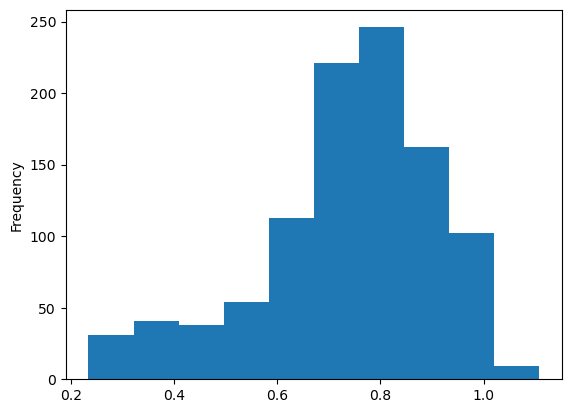

In [178]:
df['actual_productivity'].plot(kind = 'hist')

In [179]:
df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,actual_productivity
team,1.000000,0.046141,-0.119345,-9.401603e-03,-0.110302,-0.007094,-0.007906,0.025404,-0.012417,-0.083577,...,2.888632e-03,-3.429311e-02,2.620140e-02,-0.006723,-0.002157,0.013721,-0.021744,0.014924,0.001592,-0.155700
targeted_productivity,0.046141,1.000000,-0.063188,4.608324e-02,-0.068724,0.030013,-0.075447,-0.060166,-0.228722,-0.076844,...,-1.267088e-02,7.131570e-02,-4.906438e-02,-0.006663,0.022040,0.049497,-0.073327,0.014753,-0.005486,0.401069
smv,-0.119345,-0.063188,1.000000,-1.982500e-02,0.682370,0.014091,0.059230,0.111464,0.312937,0.910364,...,-5.146160e-01,-5.419475e-01,8.700931e-01,0.014616,-0.038968,0.003471,-0.003454,0.015258,0.007407,-0.126243
wip,-0.009402,0.046083,-0.019825,1.000000e+00,0.019629,0.019884,-0.027860,-0.051794,-0.071131,0.007158,...,-3.470716e-17,-4.159864e-17,4.059004e-17,0.184113,-0.031125,-0.032496,-0.038819,-0.035473,-0.042963,0.087362
over_time,-0.110302,-0.068724,0.682370,1.962921e-02,1.000000,-0.023894,0.027325,-0.027308,0.059564,0.734937,...,-4.242222e-01,-4.056736e-01,6.830560e-01,-0.009212,-0.011067,-0.000665,0.074077,-0.008829,-0.042604,-0.033712
incentive,-0.007094,0.030013,0.014091,1.988351e-02,-0.023894,1.000000,-0.010827,-0.021746,-0.032903,0.029765,...,9.425364e-02,-1.227436e-01,2.548006e-02,0.191881,-0.037411,-0.041296,-0.036972,-0.032600,-0.040662,0.074926
idle_time,-0.007906,-0.075447,0.059230,-2.785957e-02,0.027325,-0.010827,1.000000,0.488148,-0.007974,0.055972,...,-2.810941e-02,-2.922185e-02,4.720954e-02,-0.024000,0.049493,-0.020193,-0.021605,-0.020370,0.036539,-0.058365
idle_men,0.025404,-0.060166,0.111464,-5.179390e-02,-0.027308,-0.021746,0.488148,1.000000,0.150157,0.110622,...,-5.972827e-02,-6.209203e-02,1.003132e-01,-0.044142,-0.013659,0.018615,0.006400,0.020037,0.011118,-0.186789
no_of_style_change,-0.012417,-0.228722,0.312937,-7.113118e-02,0.059564,-0.032903,-0.007974,0.150157,1.000000,0.334612,...,-1.830335e-01,-1.902771e-01,3.074034e-01,-0.007810,0.000978,-0.034783,0.006462,0.012534,0.021304,-0.217396
no_of_workers,-0.083577,-0.076844,0.910364,7.158349e-03,0.734937,0.029765,0.055972,0.110622,0.334612,1.000000,...,-5.529382e-01,-5.860339e-01,9.379915e-01,0.021189,-0.048135,-0.015716,0.013058,0.021581,0.006052,-0.053273


In [180]:
import seaborn as sns

<Axes: >

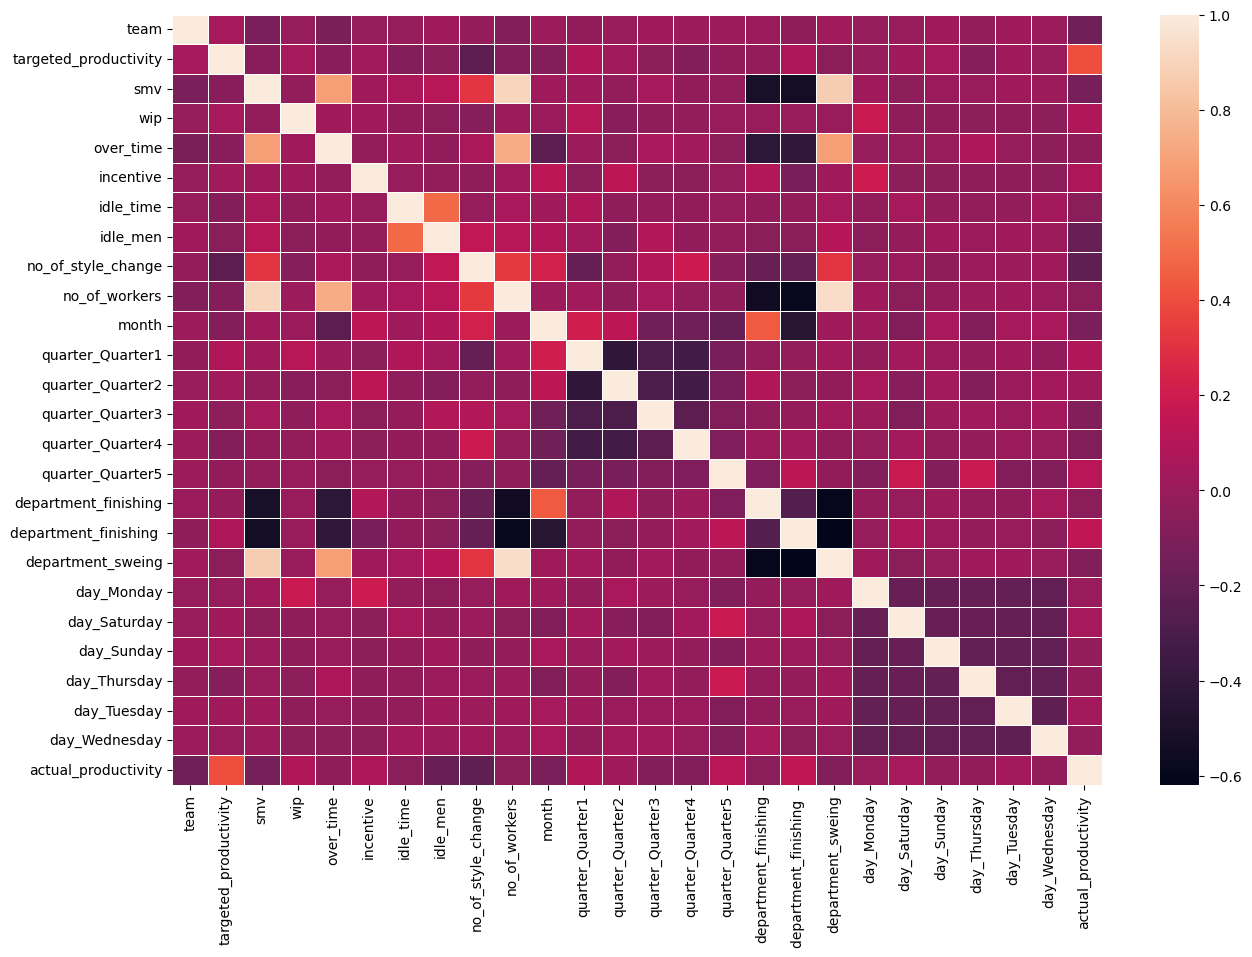

In [181]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
sns.heatmap(corr_matrix,
linewidths=0.5)

In [182]:
X = df.drop(columns=['actual_productivity','target_productivity'], axis= 1)
y = df['actual_productivity']

In [183]:
X.columns

Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers', 'month',
       'quarter_Quarter1', 'quarter_Quarter2', 'quarter_Quarter3',
       'quarter_Quarter4', 'quarter_Quarter5', 'department_finishing',
       'department_finishing ', 'department_sweing', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

In [184]:
y

0       0.755167
1       0.535678
2       0.820833
3       0.581131
4       0.790003
          ...   
1012    0.497885
1013    0.750593
1014    0.800137
1015    0.900130
1016    0.722639
Name: actual_productivity, Length: 1017, dtype: float64

In [185]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [186]:
from sklearn.linear_model import SGDRegressor

In [187]:
model = SGDRegressor(random_state = 42)
model.fit(X_train,y_train)

SGDRegressor(random_state=42)

In [188]:
model.score(X_test , y_test)

-3.1410916429470567e+33

In [189]:
model.coef_

array([-5.45273338e+11, -1.07657697e+11,  3.24519036e+11, -6.50775037e+11,
        1.91356279e+12, -1.52304419e+12,  9.89931609e+11, -4.46548564e+11,
       -1.52053864e+11, -1.30051745e+11, -3.05069776e+11, -9.93421064e+10,
        9.66260247e+10, -2.99109710e+10, -2.05792928e+10, -4.15849120e+10,
       -1.08042482e+11,  2.25959846e+08,  1.30252650e+10,  9.31320948e+10,
       -2.02760916e+11, -1.15334050e+11, -5.09812241e+10, -5.45156324e+09,
        1.86604401e+11])

In [190]:
feature_dict = dict(zip(df.columns ,list(model.coef_)))
feature_dict

{'team': -545273337880.9314,
 'targeted_productivity': -107657696592.44727,
 'smv': 324519035681.56177,
 'wip': -650775036689.5112,
 'over_time': 1913562789517.323,
 'incentive': -1523044185092.6018,
 'idle_time': 989931609206.3369,
 'idle_men': -446548563609.86816,
 'no_of_style_change': -152053863904.42694,
 'no_of_workers': -130051745488.6299,
 'month': -305069775503.4265,
 'quarter_Quarter1': -99342106393.02702,
 'quarter_Quarter2': 96626024714.72884,
 'quarter_Quarter3': -29910970983.00243,
 'quarter_Quarter4': -20579292843.491535,
 'quarter_Quarter5': -41584912031.1158,
 'department_finishing': -108042482381.64128,
 'department_finishing ': 225959846.02998662,
 'department_sweing': 13025264999.702528,
 'day_Monday': 93132094778.67778,
 'day_Saturday': -202760915844.32306,
 'day_Sunday': -115334050482.56653,
 'day_Thursday': -50981224145.43863,
 'day_Tuesday': -5451563237.219712,
 'day_Wednesday': 186604401394.961}

In [191]:
feature_df = pd.DataFrame(feature_dict , index=[0])
feature_df

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,-5.452733e+11,-1.076577e+11,3.245190e+11,-6.507750e+11,1.913563e+12,-1.523044e+12,9.899316e+11,-4.465486e+11,-1.520539e+11,-1.300517e+11,...,-4.158491e+10,-1.080425e+11,2.259598e+08,1.302526e+10,9.313209e+10,-2.027609e+11,-1.153341e+11,-5.098122e+10,-5.451563e+09,1.866044e+11


<Axes: title={'center': 'Feature Importance'}>

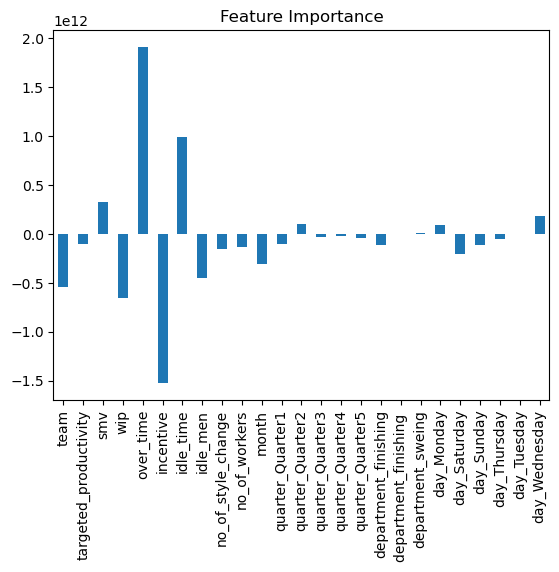

In [192]:
feature_df.T.plot.bar(title='Feature Importance', legend = False)

In [193]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train , y_train)
reg.score(X_test , y_test)

0.2757127248758475

In [194]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.4609959398794594

In [195]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.47358487785117376

In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
# Define the corrected parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2'],  # Corrected values for max_features
    'bootstrap': [True, False]
}


# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END ensemble__gb__learning_rate=0.05, ensemble__gb__max_depth=3, ensemble__gb__min_samples_leaf=1, ensemble__gb__min_samples_split=3, ensemble__gb__n_estimators=100, ensemble__rf__max_depth=20, ensemble__rf__max_features=sqrt, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=5, ensemble__rf__n_estimators=150, feature_selection__k=20; total time=   0.2s
[CV] END ensemble__gb__learning_rate=0.05, ensemble__gb__max_depth=5, ensemble__gb__min_samples_leaf=1, ensemble__gb__min_samples_split=2, ensemble__gb__n_estimators=100, ensemble__rf__max_depth=20, ensemble__rf__max_features=sqrt, ensemble__rf__min_samples_leaf=2, ensemble__rf__min_samples_split=2, ensemble__rf__n_estimators=200, feature_selection__k=20; total time=   0.2s
[CV] END ensemble__gb__learning_rate=0.1, ensemble__gb__max_depth=4, ensemble__gb__min_samples_leaf=1, ensemble__gb__min_samples_split=3, ensemble__gb__n_estimators=150, ensemble__rf

In [152]:
best_params

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [153]:
grid_search.score(X_test , y_test)

0.5274758965971069

In [154]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Create a stack of models
stack_model = StackingRegressor([
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('lr', LinearRegression())
], final_estimator=LinearRegression())

# Fit the stack model to the data
stack_model.fit(X_train, y_train)

# Evaluate the stack model
stack_model_score = stack_model.score(X_test, y_test)


In [155]:
stack_model_score

0.5644650929931421

In [157]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Create a stack of models
stack_model = StackingRegressor([
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('lr', LinearRegression())
], final_estimator=LinearRegression())

# Fit the stack model to the data
stack_model.fit(X, y)




StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(max_depth=10,
                                                     random_state=42)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())

In [159]:
from joblib import Parallel, delayed 
import joblib 
  
  
# Save the model as a pickle in a file 
joblib.dump(stack_model, 'stack_model.pkl') 


['stack_model.pkl']

In [203]:
df = pd.read_csv('./archive-3/test_dataset.csv')
df.drop(columns='targeted_productivity',axis=1,inplace = True)
df.isna().sum()


team                      0
smv                       0
wip                      83
over_time                 0
incentive                 0
idle_time                 0
idle_men                  0
no_of_style_change        0
no_of_workers             0
month                     0
quarter_Quarter1          0
quarter_Quarter2          0
quarter_Quarter3          0
quarter_Quarter4          0
quarter_Quarter5          0
department_finishing      0
department_finishing      0
department_sweing         0
day_Monday                0
day_Saturday              0
day_Sunday                0
day_Thursday              0
day_Tuesday               0
day_Wednesday             0
dtype: int64

In [206]:
df['wip'] = df['wip'].fillna(df['wip'].mean())

In [209]:
df.columns

Index(['team', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'month', 'quarter_Quarter1',
       'quarter_Quarter2', 'quarter_Quarter3', 'quarter_Quarter4',
       'quarter_Quarter5', 'department_finishing', 'department_finishing ',
       'department_sweing', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

In [207]:
loaded_stack_model = joblib.load('stack_model.pkl')

In [210]:
predictions = loaded_stack_model.predict(df)

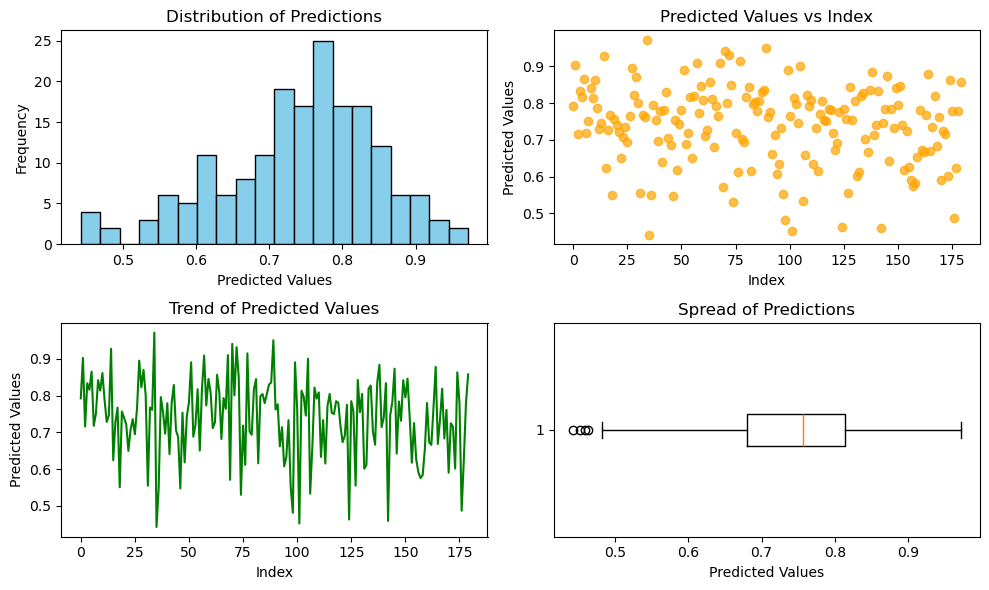

In [213]:
import matplotlib.pyplot as plt

# Plotting the predictions
plt.figure(figsize=(10, 6))

# Histogram of Predictions
plt.subplot(221)
plt.hist(predictions, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')

# Scatter Plot of Predicted vs Index
plt.subplot(222)
plt.scatter(range(len(predictions)), predictions, color='orange', alpha=0.7)
plt.title('Predicted Values vs Index')
plt.xlabel('Index')
plt.ylabel('Predicted Values')

# Line Plot of Predicted Values
plt.subplot(223)
plt.plot(predictions, color='green')
plt.title('Trend of Predicted Values')
plt.xlabel('Index')
plt.ylabel('Predicted Values')

# Boxplot of Predictions
plt.subplot(224)
plt.boxplot(predictions, vert=False)
plt.title('Spread of Predictions')
plt.xlabel('Predicted Values')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [214]:
df.head()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,month,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,12,4.08,1235.061856,1080,0,0.0,0,0,9.0,1,...,1,0,1,0,0,1,0,0,0,0
1,4,4.15,1235.061856,2400,0,0.0,0,0,20.0,2,...,0,1,0,0,0,0,1,0,0,0
2,3,30.10,1057.000000,0,40,0.0,0,1,58.0,2,...,0,0,0,1,0,0,0,0,0,1
3,7,3.94,1235.061856,2160,0,0.0,0,0,18.0,2,...,0,0,1,0,0,0,1,0,0,0
4,5,4.15,1235.061856,1440,0,0.0,0,0,8.0,1,...,0,0,1,0,0,0,1,0,0,0


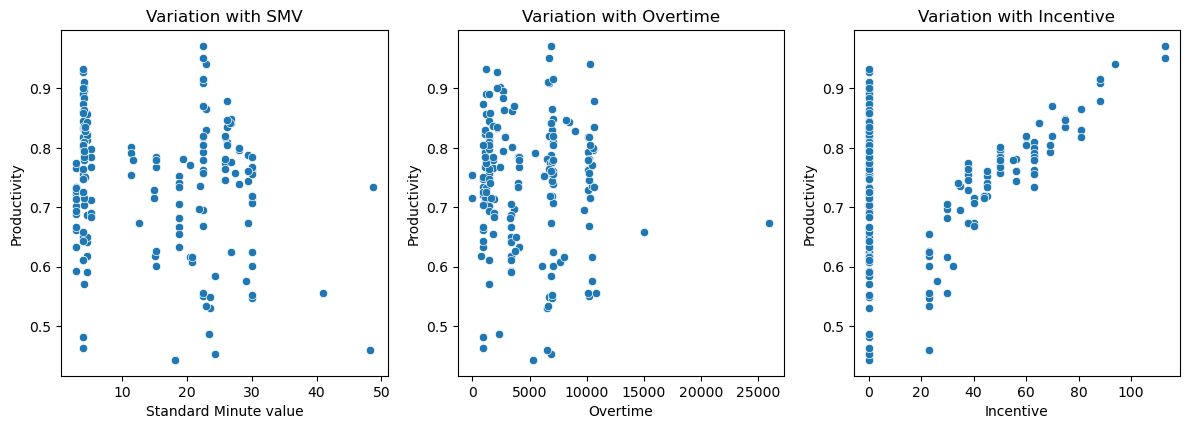

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns


# Combine features and predictions into a single DataFrame
data = pd.concat([df, pd.Series(predictions, name='Predictions')], axis=1)

# Plotting the variation in productivity with respect to different features
plt.figure(figsize=(12, 8))

# Example: Variation in productivity with respect to 'smv' (Standard Minute Value)
plt.subplot(231)
sns.scatterplot(x='smv', y='Predictions', data=data)
plt.title('Variation with SMV')
plt.ylabel('Productivity')
plt.xlabel('Standard Minute value')
# Example: Variation in productivity with respect to 'over_time'
plt.subplot(232)
sns.scatterplot(x='over_time', y='Predictions', data=data)
plt.title('Variation with Overtime')
plt.ylabel('Productivity')
plt.xlabel('Overtime')

plt.subplot(233)
sns.scatterplot(x='incentive', y='Predictions', data=data)
plt.title('Variation with Incentive')
plt.ylabel('Productivity')
plt.xlabel('Incentive')




# Adjust layout and display the plots
plt.tight_layout()
plt.show()
